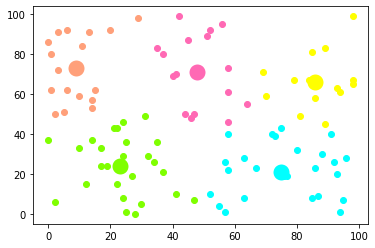

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def distance(e1, e2):
    return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2)

def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])

def farthest(k_arr, arr):
    f = [0, 0]
    max_d = 0
    for e in arr:
        d = 0
        for i in range(k_arr.__len__()):
            d = d + np.sqrt(distance(k_arr[i], e))
        if d > max_d:
            max_d = d
            f = e
    return f
arr = np.random.randint(100, size=(100, 1, 2))[:, 0, :]
m = 5
r = np.random.randint(arr.__len__() - 1)
k_arr = np.array([arr[r]])
cla_arr = [[]]
for i in range(m - 1):
    k = farthest(k_arr, arr)
    k_arr = np.concatenate([k_arr, np.array([k])])
    cla_arr.append([])
n = 20
cla_temp = cla_arr
for i in range(n):    # 迭代n次
    for e in arr:    # 把集合里每一个元素聚到最近的类
        ki = 0        # 假定距离第一个中心最近
        min_d = distance(e, k_arr[ki])
        for j in range(1, k_arr.__len__()):
            if distance(e, k_arr[j]) < min_d:    # 找到更近的聚类中心
                min_d = distance(e, k_arr[j])
                ki = j
        cla_temp[ki].append(e)
    # 迭代更新聚类中心
    for k in range(k_arr.__len__()):
        if n - 1 == i:
            break
        k_arr[k] = means(cla_temp[k])
        cla_temp[k] = []

col = ['HotPink', 'Aqua', 'Chartreuse', 'yellow', 'LightSalmon']
for i in range(m):
    plt.scatter(k_arr[i][0], k_arr[i][1], linewidth=10, color=col[i])
    plt.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]], color=col[i])
plt.show()